In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
df_true = pd.read_csv("True.csv")
df_true["Label"] = 1
df_fake = pd.read_csv("Fake.csv")
df_fake["Label"] = 0
df_all = pd.concat([df_true,df_fake],axis=0)


In [4]:
df_all = df_all.sample(frac=1).reset_index(drop=True)
df_all

,title,text,subject,date,Label
0,Delaware is first U.S. state to enact abortion...,(Reuters) - Delaware’s governor has signed int...,politicsNews,"June 9, 2017",1
1,Is North Korea’s Kim Jong-un Considering Using...,What will he think of next? Is Kim Jong-un is ...,Government News,"Aug 28, 2017",0
2,Trump keeping options open as Republican feud ...,WASHINGTON (Reuters) - Like the deal-maker he ...,politicsNews,"October 16, 2017",1
3,CNN Host Calls Out Trump’s Uncle Tom Spokeswo...,Katrina Pierson is a black woman. She is also ...,News,"February 29, 2016",0
4,Trump's pick for Navy secretary withdraws,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"February 27, 2017",1
...,...,...,...,...,...
44893,Alec Baldwin Just Put Trump’s Idiot Supporter...,Saturday Night Live returned with a stellar co...,News,"April 9, 2017",0
44894,The King Of Anti-Hillary Trolling Is A Near B...,"If you ve spent much time on social media, you...",News,"September 23, 2016",0
44895,Trump considers plan to replace Tillerson with...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 30, 2017",1
44896,CIA 'mission' on cars shows concern about next...,SAN FRANCISCO (Reuters) - WikiLeaks documents ...,politicsNews,"March 9, 2017",1


In [5]:
df_all.title[1]

'Is North Korea’s Kim Jong-un Considering Using 70-Year Old Biplanes to Go Undetected By Modern Radar?'

In [6]:
df_all.text[0]

'(Reuters) - Delaware’s governor has signed into law a bill ensuring abortion remains legal in the state, the first such move in the United States since President Donald Trump was elected on a pledge to overturn a landmark ruling that legalized abortion nationally. A spokesman for Democratic Governor John Carney Jr. said on Friday he supported the rights and protections afforded under Roe v. Wade, a 1973 Supreme Court decision protecting a woman’s right to abortion. “For that reason, he signed the bill into law,” said the spokesman, Jonathan Starkey, noting that the law takes effect immediately. Trump, a Republican whose election was backed by anti-abortion groups, has promised to appoint justices to the nation’s top court who would overturn Roe v. Wade and let states decide whether to legalize abortion.  States have responded by seeking to write Roe V. Wade into their own laws, with Delaware the first to do so successfully.  Abortion rights advocates on Friday cheered the Delaware law

# **Finding Fake News Based on Title**

In [7]:
X_title = df_all.title[:10000]
y_title = df_all.Label[:10000]


In [8]:
num_words = 10000
max_len= 200
tokenizer = keras.preprocessing.text.Tokenizer(num_words=num_words+1)
tokenizer.fit_on_texts(X_title)
X_title_sequence = tokenizer.texts_to_sequences(X_title)
X_title_padded = keras.preprocessing.sequence.pad_sequences(X_title_sequence, maxlen=max_len, padding="post", truncating="post")

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_title_padded,np.array(y_title),test_size=0.2)

In [10]:
model_title = keras.Sequential([keras.layers.Embedding(num_words+1,16,input_length=max_len),
                          keras.layers.Bidirectional(keras.layers.LSTM(64)),
                          keras.layers.Dense(16,activation="relu"),
                          keras.layers.Dense(1,activation="sigmoid")
])

In [11]:
model_title.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer="adam")

In [12]:
history = model_title.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=5)

Epoch 1/5
250/250 [==============================] - 62s 213ms/step - loss: 0.4472 - accuracy: 0.7639 - val_loss: 0.1777 - val_accuracy: 0.9340
Epoch 2/5
250/250 [==============================] - 32s 127ms/step - loss: 0.1077 - accuracy: 0.9589 - val_loss: 0.1436 - val_accuracy: 0.9480
Epoch 3/5
250/250 [==============================] - 35s 140ms/step - loss: 0.0511 - accuracy: 0.9843 - val_loss: 0.1445 - val_accuracy: 0.9500
Epoch 4/5
250/250 [==============================] - 35s 138ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.1495 - val_accuracy: 0.9490
Epoch 5/5
250/250 [==============================] - 39s 156ms/step - loss: 0.0143 - accuracy: 0.9964 - val_loss: 0.1692 - val_accuracy: 0.9500


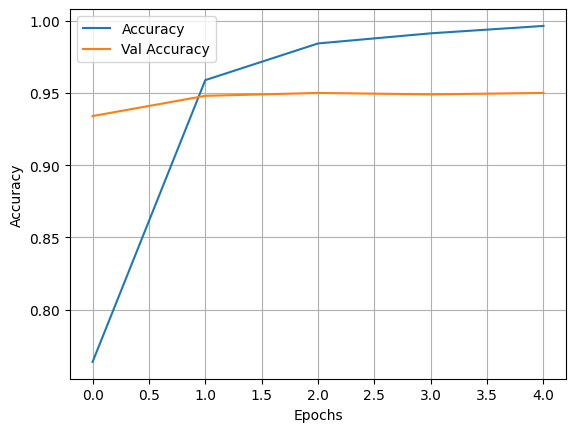

In [13]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

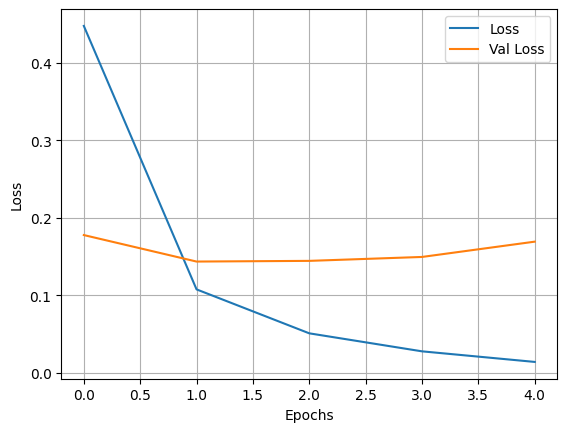

In [14]:
plt.plot(history_df.loss,label="Loss")
plt.plot(history_df.val_loss,label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

In [16]:
def predict_title(sentence,model):
    #sentence_seq = tokenizer.texts_to_sequences(sentence)
    sentence_pad = keras.preprocessing.sequence.pad_sequences(sentence,maxlen=max_len, padding="post", truncating="post")
    prediction = model.predict(sentence_pad)
    if prediction > 0.5:
        predict = 1
    else:
        predict = 0
    return predict

In [19]:
predict_title(["HILLARY DNC SPEECH: “We Are Going To Follow The Money"],model_title)

1/1 [==============================] - 0s 65ms/step


0

In [20]:
predict_title(["U.N.'s de Mistura to visit Moscow on Friday: RIA Daniel Greenfield s take on why Obama spied on Trump is the best yet."],model_title)

1/1 [==============================] - 0s 59ms/step


1

In [17]:
y_pred = []
p = 0
for i in X_train:
    p+=1
    print(p,"/",len(X_train))
    a = predict_title([i],model_title)
    y_pred.append(a)


1 / 8000
1/1 [==============================] - 1s 1s/step
2 / 8000
1/1 [==============================] - 0s 84ms/step
3 / 8000
1/1 [==============================] - 0s 81ms/step
4 / 8000
1/1 [==============================] - 0s 50ms/step
5 / 8000
1/1 [==============================] - 0s 53ms/step
6 / 8000
1/1 [==============================] - 0s 55ms/step
7 / 8000
1/1 [==============================] - 0s 59ms/step
8 / 8000
1/1 [==============================] - 0s 65ms/step
9 / 8000
1/1 [==============================] - 0s 70ms/step
10 / 8000
1/1 [==============================] - 0s 61ms/step
11 / 8000
1/1 [==============================] - 0s 44ms/step
12 / 8000
1/1 [==============================] - 0s 82ms/step
13 / 8000
1/1 [==============================] - 0s 62ms/step
14 / 8000
1/1 [==============================] - 0s 66ms/step
15 / 8000
1/1 [==============================] - 0s 65ms/step
16 / 8000
1/1 [==============================] - 0s 62ms/step
17 / 8000
1/1 [====

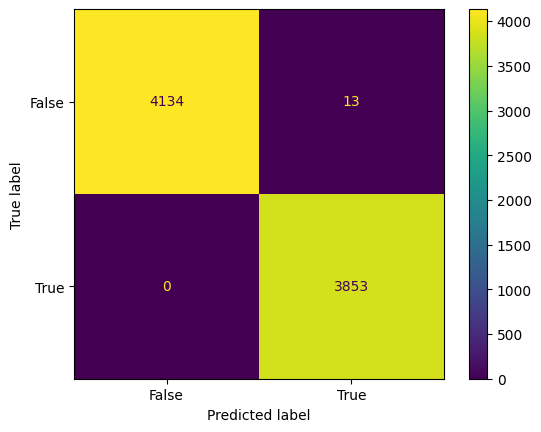

In [18]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [19]:
y_pred2 = []
p = 0
for i in X_val:
    p += 1
    print(p,"/",len(X_val))
    a = predict_title([i],model_title)
    y_pred2.append(a)

1 / 2000
1/1 [==============================] - 0s 129ms/step
2 / 2000
1/1 [==============================] - 0s 160ms/step
3 / 2000
1/1 [==============================] - 0s 99ms/step
4 / 2000
1/1 [==============================] - 0s 82ms/step
5 / 2000
1/1 [==============================] - 0s 123ms/step
6 / 2000
1/1 [==============================] - 0s 88ms/step
7 / 2000
1/1 [==============================] - 0s 78ms/step
8 / 2000
1/1 [==============================] - 0s 67ms/step
9 / 2000
1/1 [==============================] - 0s 78ms/step
10 / 2000
1/1 [==============================] - 0s 56ms/step
11 / 2000
1/1 [==============================] - 0s 55ms/step
12 / 2000
1/1 [==============================] - 0s 164ms/step
13 / 2000
1/1 [==============================] - 0s 150ms/step
14 / 2000
1/1 [==============================] - 0s 77ms/step
15 / 2000
1/1 [==============================] - 0s 49ms/step
16 / 2000
1/1 [==============================] - 0s 80ms/step
17 / 2000
1/

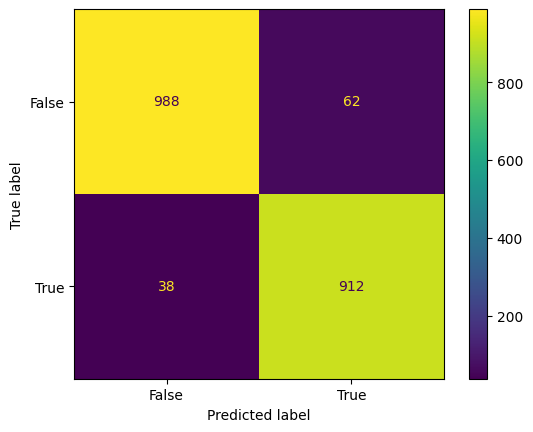

In [20]:
confusion_matrix = metrics.confusion_matrix(y_val, y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [21]:
model_title.evaluate(X_val,y_val)

63/63 [==============================] - 2s 30ms/step - loss: 0.1692 - accuracy: 0.9500


[0.1692369133234024, 0.949999988079071]

In [23]:
model_title.evaluate(X_train,y_train)

250/250 [==============================] - 8s 32ms/step - loss: 0.0080 - accuracy: 0.9984


[0.007961087860167027, 0.9983749985694885]

In [24]:
model_title.save("model1.keras")

import pickle 
with open('tokenizer1.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [26]:
p = 0
for i in range(len(X_title)):
    if y_train[i] == 0 :
        p += 1
        if p == 6:
            print(X_title[i])
            break

Republican Senator Alexander to consult on bipartisan healthcare plan
